In [47]:
%matplotlib inline
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
from ydata_profiling import ProfileReport
from quickda.clean_data import *

# Leer archivo csv
ocurrencias = pd.read_csv('./data/Ocurrencia.csv' , low_memory=False, encoding_errors='ignore')
ocurrencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               286 non-null    int64 
 1   Departamento      286 non-null    object
 2   Total             286 non-null    int64 
 3   Hospital_publico  286 non-null    int64 
 4   Hospital_privado  286 non-null    int64 
 5   Hospital          286 non-null    int64 
 6   Centro_Salud      286 non-null    int64 
 7   Seguro_Social     286 non-null    int64 
 8   Vía_pública       286 non-null    int64 
 9   Domicilio         286 non-null    int64 
 10  Lugar_de_trabajo  286 non-null    int64 
 11  Otro              286 non-null    int64 
 12  Ignorado          286 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 29.2+ KB


In [48]:
ocurrencias

Año   Departamento  Total  Hospital_publico  Hospital_privado  Hospital  \
0    2009      Guatemala  16887                 0                 0      7132   
1    2009    El Progreso   1028                 0                 0       340   
2    2009   Sacatepéquez   1537                 0                 0       437   
3    2009  Chimaltenango   2670                 0                 0       462   
4    2009      Escuintla   3950                 0                 0      1358   
..    ...            ...    ...               ...               ...       ...   
281  2021         Izabal   2932               569                66         0   
282  2021         Zacapa   2090               443               112         0   
283  2021     Chiquimula   2815               491               175         0   
284  2021         Jalapa   2187               287                71         0   
285  2021        Jutiapa   3675               700               129         0   

     Centro_Salud  Seguro_Social  Vía_pública  Domicilio  Lugar_de_trabajo  \
0              71              0         1953       7686                 0   
1              12              0           95        572                 0   
2               4              0           99        987                 0   
3               7              0          196       1998                 0   
4              20              0          544       2014                 0   
..            ...            ...          ...        ...               ...   
281            23            286           46       1735                 0   
282             6            126           32       1217                 0   
283            12             95           37       1798                 0   
284             5             62           17       1582                 0   
285             8             93           28       2542                 0   

     Otro  Ignorado  
0       0        45  
1       0         9  
2       0        10  
3       0         7  
4       0        14  
..    ...       ...  
281    30       177  
282    20       134  
283    20       187  
284    22       141  
285    19       156  

[286 rows x 13 columns]

In [49]:
servicios.isnull().any()

Año                        False
Tipo                       False
Departamento_residencia    False
Todas las causas           False
Total                      False
Hombres                    False
Mujeres                    False
Ignorado                   False
dtype: bool

In [50]:
profile = ProfileReport(servicios)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

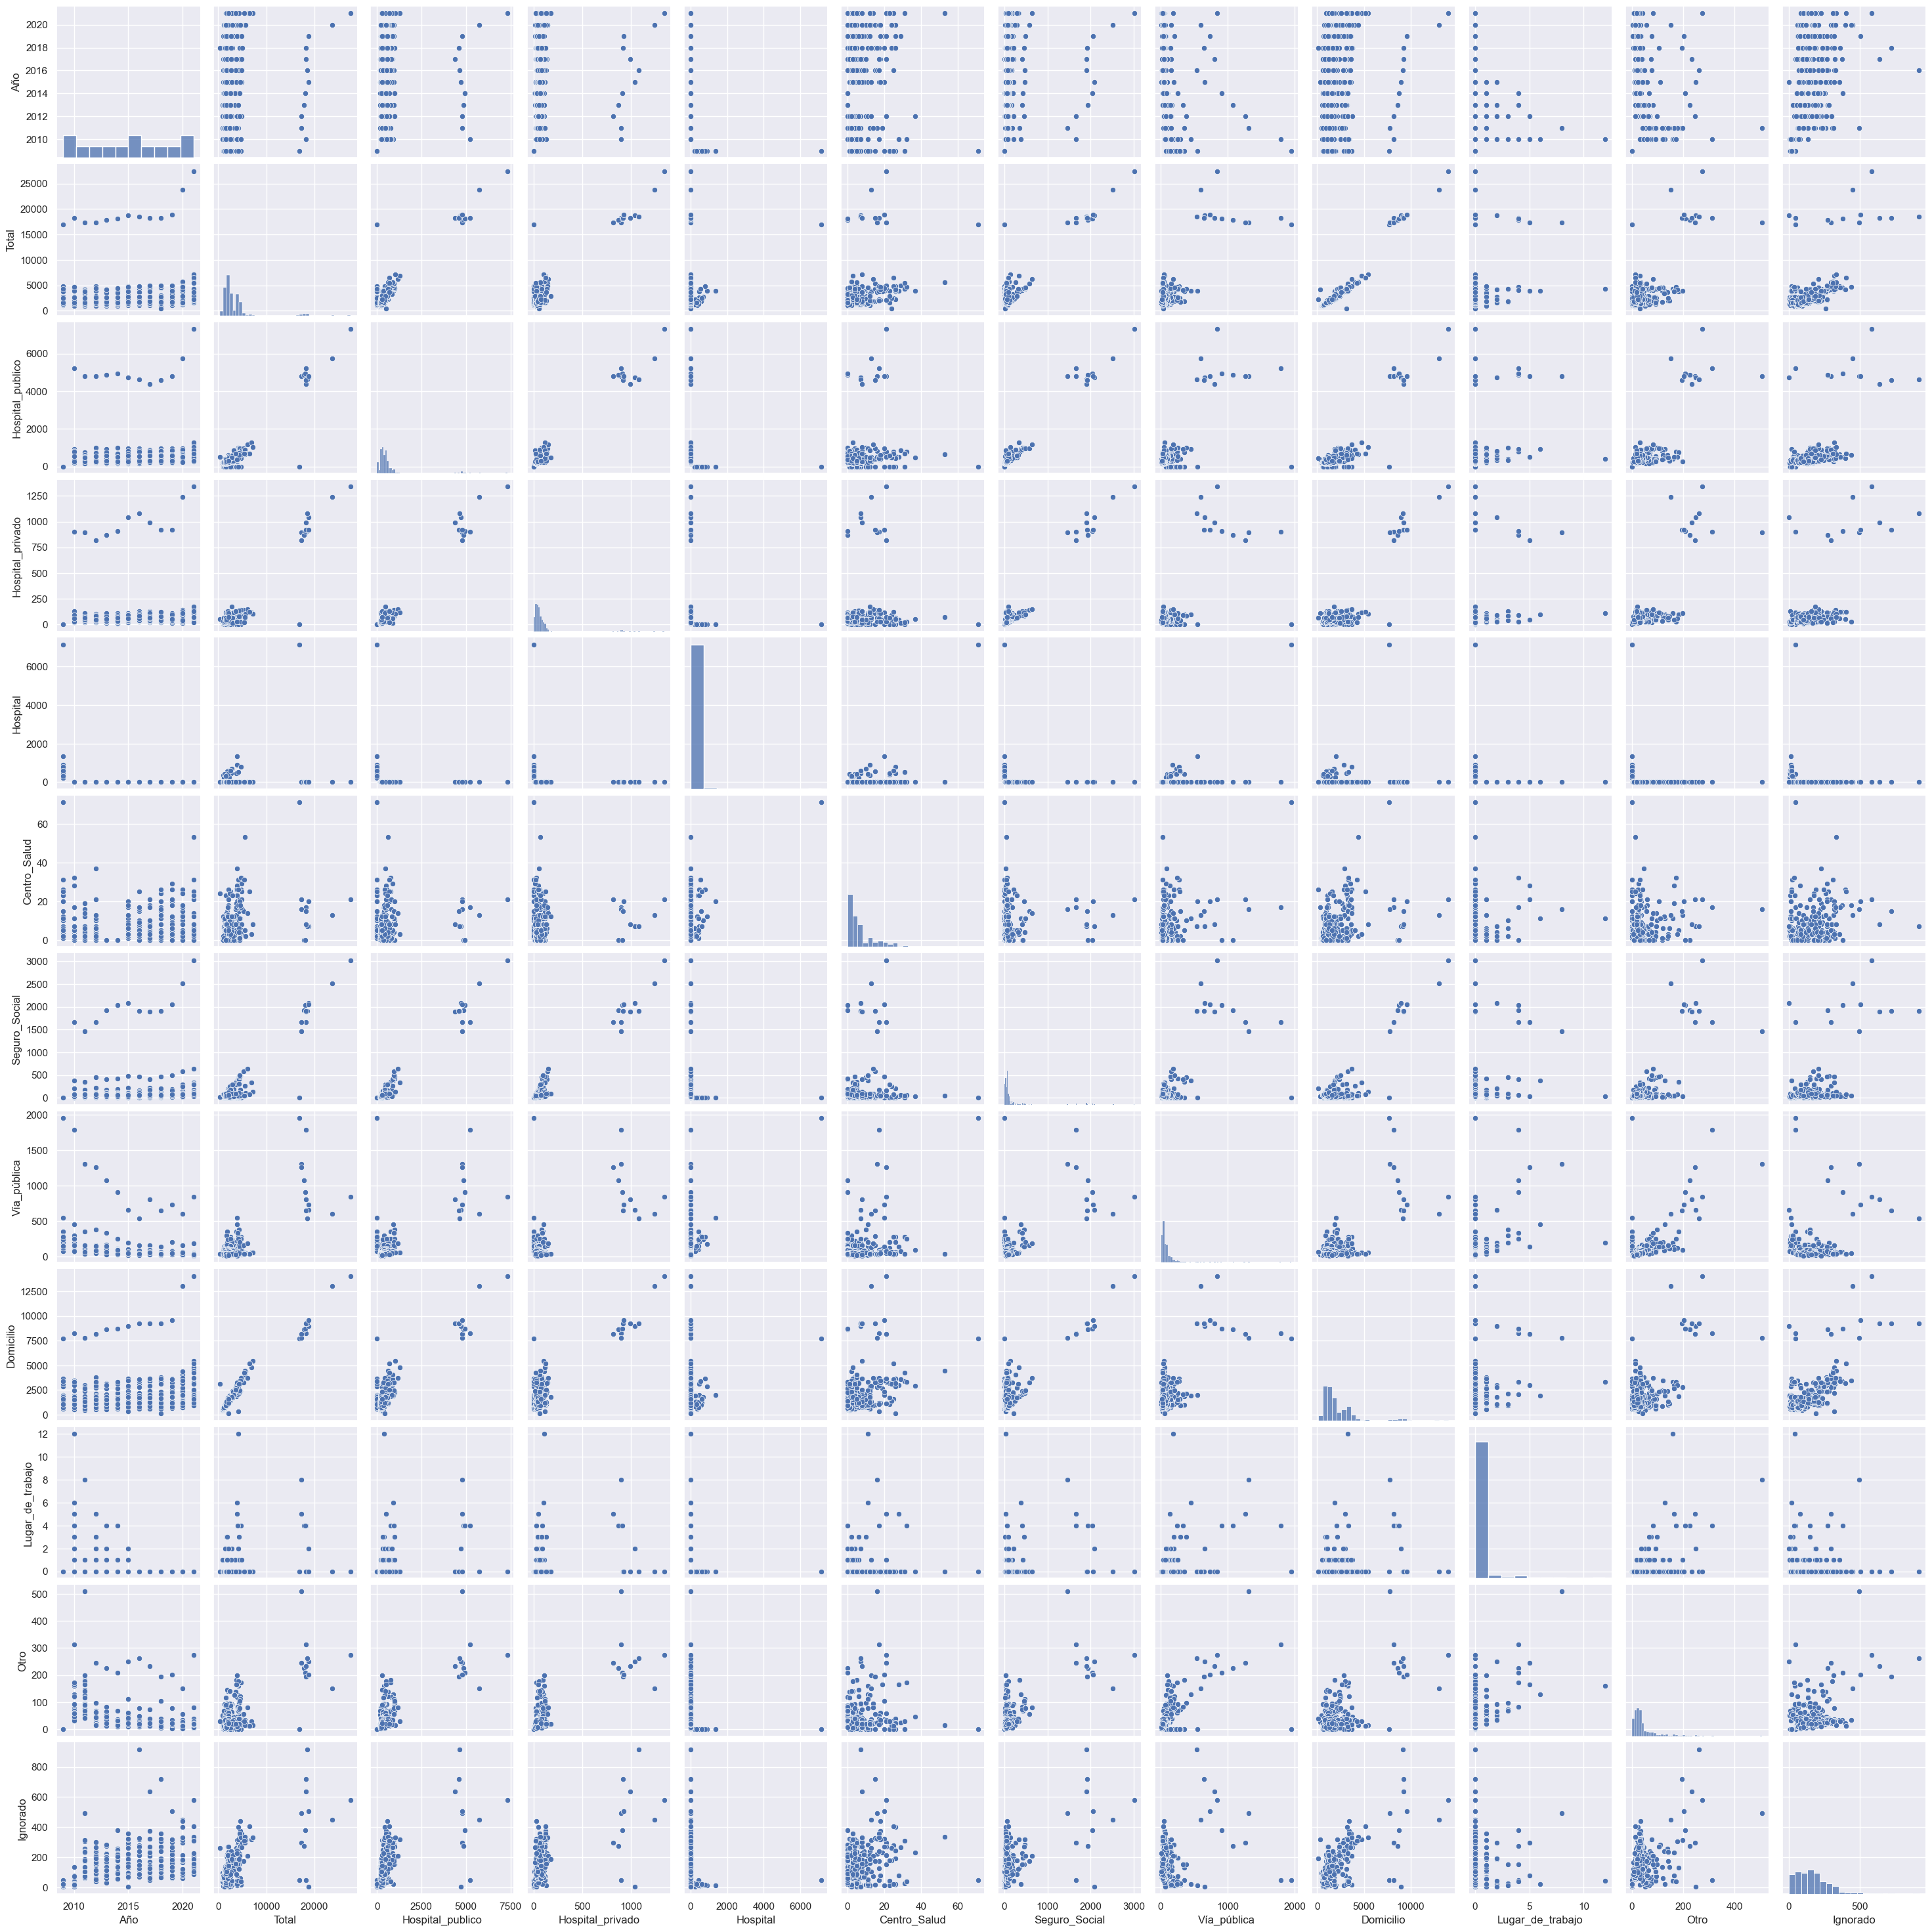

In [51]:
sns.pairplot(ocurrencias)

In [56]:
# tabla = pd.pivot_table(ocurrencias, values='Total', index= 'Año', columns= ['Hospital_publico', 'Hospital_privado'], aggfunc='sum')
tabla = pd.pivot_table(
    ocurrencias, 
    values = ['Hospital_publico', 'Hospital_privado', 'Hospital', 'Centro_Salud', 'Seguro_Social', 'Vía_pública', 'Lugar_de_trabajo', 'Domicilio', 'Otros'], 
    index= 'Año', 
    aggfunc='sum'
)

tabla

Centro_Salud  Domicilio  Hospital  Hospital_privado  Hospital_publico  \
Año                                                                           
2009           342      44342     18128                 0                 0   
2010           151      43102         0              2061             14410   
2011           126      38286         0              2048             12592   
2012           165      44365         0              1870             14071   
2013             0      43112         0              1851             13630   
2014             0      43926         0              1985             13802   
2015           154      44229         0              2224             14036   
2016           146      47110         0              2380             14312   
2017           157      48238         0              2283             13953   
2018           192      47643         0              2121             14378   
2019           208      49177         0              2022             14821   
2020           196      58496         0              2714             15219   
2021           254      72259         0              3228             20405   

      Lugar_de_trabajo  Seguro_Social  Vía_pública  
Año                                                 
2009                 0              0         6345  
2010                48           3200         5515  
2011                12           2953         3574  
2012                15           3363         3534  
2013                14           3583         3137  
2014                 9           3751         2499  
2015                 7           3994         1875  
2016                 0           3739         1364  
2017                 0           3692         1973  
2018                 0           3814         1545  
2019                 0           4086         1916  
2020                 0           5074         1521  
2021                 0           6121         1702

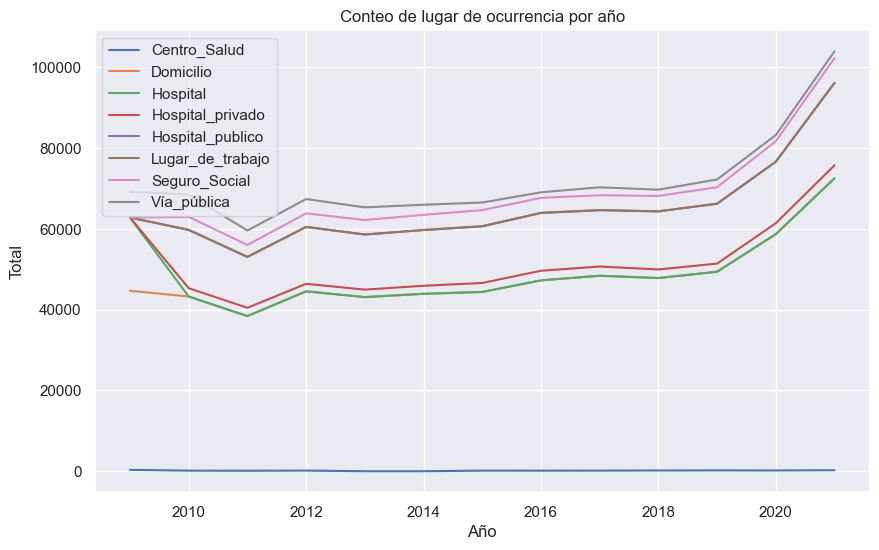

In [61]:

# Graficar los resultados utilizando un gráfico de barras apiladas
tabla.plot(stacked=True, figsize=(10, 6))
plt.xlabel('Año')
plt.ylabel('Total')
plt.title('Conteo de lugar de ocurrencia por año')
plt.show()

In [68]:
tabla = pd.pivot_table(
    ocurrencias, 
    values = 'Total', 
    index= 'Año', 
    columns = 'Departamento',
    aggfunc='sum'
)

tabla

Departamento  Alta Verapaz  Baja Verapaz  Chimaltenango  Chiquimula  \
Año                                                                   
2009                  4240          1238           2670        1985   
2010                  4694          1285           2612        2085   
2011                  3736          1197           2459        1929   
2012                  4481          1311           2758        2116   
2013                  4189          1206           2573        2095   
2014                  4406          1174           2642        1920   
2015                  4668          1322           2703        2134   
2016                  4822          1363           2883        2022   
2017                  4899          1352           2893        2137   
2018                  4957          1401           2857        2029   
2019                  4917          1413           2984        2070   
2020                  4651          1425           3113        2022   
2021                  5423          1814           4354        2815   

Departamento  El Progreso  Escuintla  Guatemala  Huehuetenango  Izabal  \
Año                                                                      
2009                 1028       3950      16887           3934    1873   
2010                  993       3915      18187           4266    1874   
2011                  919       3742      17275           3865    1783   
2012                  964       4296      17302           4158    1864   
2013                  930       4085      17852           4037    1948   
2014                 1004       4245      18123           3949    1990   
2015                 1088       4558      18734           4231    2121   
2016                 1043       4294      18540           4324    2219   
2017                 1079       4278      18182           4554    2029   
2018                 1044       4416      18247           4511    2193   
2019                 1126       4540      18820           4225    2152   
2020                 1214       5333      23719           4764    2487   
2021                 1587       6170      27445           6531    2932   

Departamento  Jalapa  ...  Quetzaltenango  Quiché  Retalhuleu  Sacatepéquez  \
Año                   ...                                                     
2009            1584  ...            3921    3826        1621          1537   
2010            1638  ...            3901    3967        1512          1535   
2011            1571  ...            3708    3394        1483          1481   
2012            1699  ...            4076    3912        1667          1605   
2013            1714  ...            3744    3555        1729          1569   
2014            1611  ...            3940    3551        1729          1546   
2015            1731  ...            4210    3836        1910          1594   
2016            1767  ...            4476    3670        1874          1657   
2017            1819  ...            4362    3841        1837          1652   
2018            1747  ...            4516     405        1901          1737   
2019            1739  ...            4664    3859        1871          1783   
2020            1649  ...            5616    4193        2255          2061   
2021            2187  ...            6904    5617        2610          2709   

Departamento  San Marcos  Santa Rosa  Sololá  Suchitepéquez  Totonicapán  \
Año                                                                        
2009                4787        2067    1743           2781         2289   
2010                4586        2134    1543           2794         2269   
2011                4213        2023    1432           2564         1995   
2012                4846        2196    1675           2852         2359   
2013                4168        2095    1720           2694         2042   
2014                4362        2061    1683           2792         2067   
2015                4872     

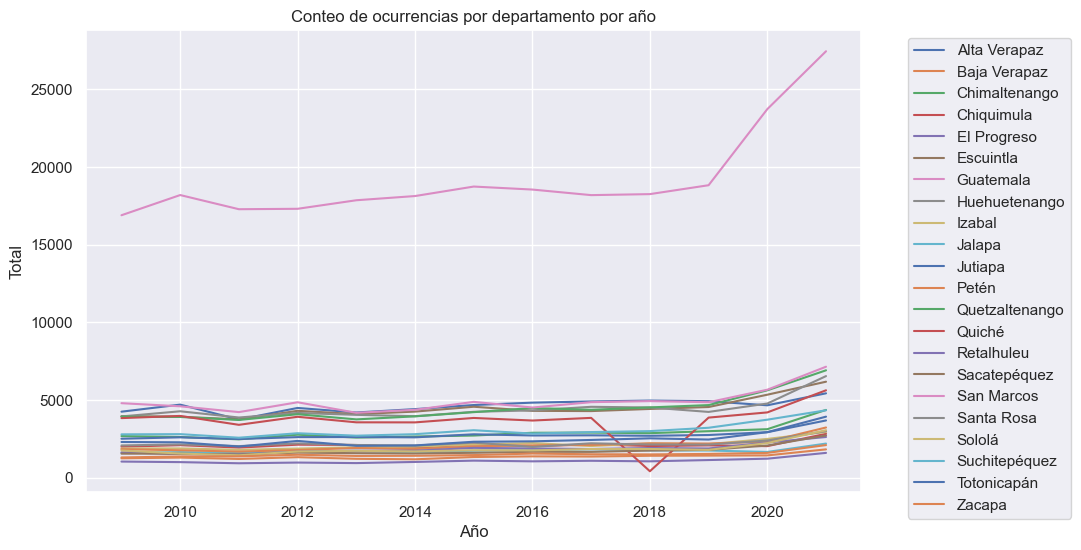

In [71]:
tabla.plot( figsize=(10, 6))
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('Año')
plt.ylabel('Total')
plt.title('Conteo de ocurrencias por departamento por año')
plt.show()

In [134]:
tabla = pd.pivot_table(
    ocurrencias, 
    values = ['Hospital_publico', 'Hospital_privado', 'Hospital', 'Centro_Salud', 'Seguro_Social', 'Vía_pública', 'Lugar_de_trabajo', 'Domicilio', 'Otro'],

    columns = 'Departamento',
    aggfunc='sum'
)

tabla

Departamento      Alta Verapaz  Baja Verapaz  Chimaltenango  Chiquimula  \
Centro_Salud               263            76             63          84   
Domicilio                44572         12296          26680       17088   
Hospital                   536           221            462         435   
Hospital_privado           320           277            689        1098   
Hospital_publico          8663          2606           5399        4244   
Lugar_de_trabajo             8             1              4           3   
Otro                       708           202            394         516   
Seguro_Social              644           442            813         747   
Vía_pública               1216           453           1052        1173   

Departamento      El Progreso  Escuintla  Guatemala  Huehuetenango  Izabal  \
Centro_Salud               19        129        216            179     194   
Domicilio                7991      30897     122555          41442   13770   
Hospital                  340       1358       7132            472     575   
Hospital_privado          449       1346      11914           1349    1115   
Hospital_publico         2918      11505      60794           5084    5285   
Lugar_de_trabajo            1         14         27             13       5   
Otro                      220       1141       3066            607     537   
Seguro_Social             700       5550      24127            462    1844   
Vía_pública               547       3501      13113           1063    1516   

Departamento      Jalapa  ...  Quetzaltenango  Quiché  Retalhuleu  \
Centro_Salud          38  ...              33     278          42   
Domicilio          15191  ...           39744   38957       15758   
Hospital             337  ...             893     473         377   
Hospital_privado     529  ...            1042     627         534   
Hospital_publico    3346  ...            9726    6053        3988   
Lugar_de_trabajo       1  ...               3       7           2   
Otro                 336  ...             613     569         240   
Seguro_Social        502  ...            1595     381        1398   
Vía_pública          714  ...            1267     930         683   

Departamento      Sacatepéquez  San Marcos  Santa Rosa  Sololá  Suchitepéquez  \
Centro_Salud                11          75          63      29             37   
Domicilio                14632       48333       16204   18120          26542   
Hospital                   437         798         605     275            692   
Hospital_privado           818         871         505     371            771   
Hospital_publico          3693        7522        6573    2409           5647   
Lugar_de_trabajo             3           3           3       0              3   
Otro                       431         579         492     299            585   
Seguro_Social             1013         974         873     351           2552   
Vía_pública                713        1252        1371     532           1164   

Departamento      Totonicapán  Zacapa  
Centro_Salud               39      74  
Domicilio               25765   10507  
Hospital                  265     419  
Hospital_privado          223     597  
Hospital_publico         2951    4230  
Lugar_de_trabajo            1       0  
Otro                      275     415  
Seguro_Social             168    1078  
Vía_pública               470     954  

[9 rows x 22 columns]

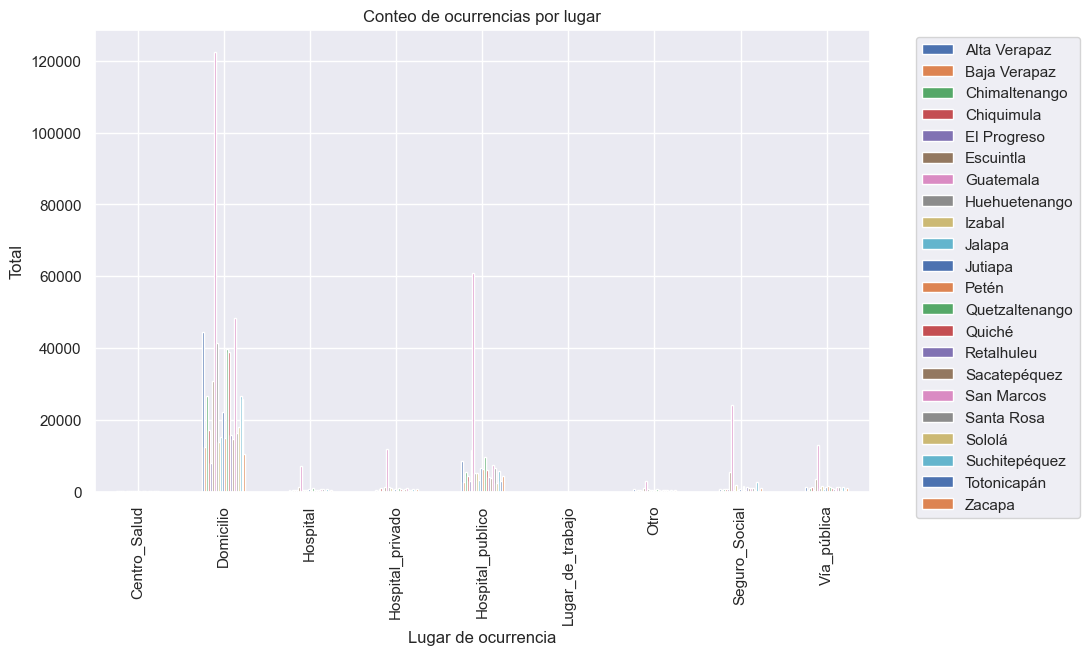

In [135]:
tabla.plot(kind='bar', figsize=(10, 6))
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('Lugar de ocurrencia')
plt.ylabel('Total')
plt.title('Conteo de ocurrencias por lugar')
plt.show()

In [136]:
tabla = pd.pivot_table(
    ocurrencias[ocurrencias['Departamento'] != 'Guatemala'], 
    values = ['Hospital_publico', 'Hospital_privado', 'Hospital', 'Centro_Salud', 'Seguro_Social', 'Vía_pública', 'Lugar_de_trabajo', 'Domicilio', 'Otro'],

    columns = 'Departamento',
    aggfunc='sum'
)

tabla

Departamento      Alta Verapaz  Baja Verapaz  Chimaltenango  Chiquimula  \
Centro_Salud               263            76             63          84   
Domicilio                44572         12296          26680       17088   
Hospital                   536           221            462         435   
Hospital_privado           320           277            689        1098   
Hospital_publico          8663          2606           5399        4244   
Lugar_de_trabajo             8             1              4           3   
Otro                       708           202            394         516   
Seguro_Social              644           442            813         747   
Vía_pública               1216           453           1052        1173   

Departamento      El Progreso  Escuintla  Huehuetenango  Izabal  Jalapa  \
Centro_Salud               19        129            179     194      38   
Domicilio                7991      30897          41442   13770   15191   
Hospital                  340       1358            472     575     337   
Hospital_privado          449       1346           1349    1115     529   
Hospital_publico         2918      11505           5084    5285    3346   
Lugar_de_trabajo            1         14             13       5       1   
Otro                      220       1141            607     537     336   
Seguro_Social             700       5550            462    1844     502   
Vía_pública               547       3501           1063    1516     714   

Departamento      Jutiapa  ...  Quetzaltenango  Quiché  Retalhuleu  \
Centro_Salud           77  ...              33     278          42   
Domicilio           22255  ...           39744   38957       15758   
Hospital              603  ...             893     473         377   
Hospital_privado      860  ...            1042     627         534   
Hospital_publico     6715  ...            9726    6053        3988   
Lugar_de_trabajo        0  ...               3       7           2   
Otro                  502  ...             613     569         240   
Seguro_Social         857  ...            1595     381        1398   
Vía_pública          1360  ...            1267     930         683   

Departamento      Sacatepéquez  San Marcos  Santa Rosa  Sololá  Suchitepéquez  \
Centro_Salud                11          75          63      29             37   
Domicilio                14632       48333       16204   18120          26542   
Hospital                   437         798         605     275            692   
Hospital_privado           818         871         505     371            771   
Hospital_publico          3693        7522        6573    2409           5647   
Lugar_de_trabajo             3           3           3       0              3   
Otro                       431         579         492     299            585   
Seguro_Social             1013         974         873     351           2552   
Vía_pública                713        1252        1371     532           1164   

Departamento      Totonicapán  Zacapa  
Centro_Salud               39      74  
Domicilio               25765   10507  
Hospital                  265     419  
Hospital_privado          223     597  
Hospital_publico         2951    4230  
Lugar_de_trabajo            1       0  
Otro                      275     415  
Seguro_Social             168    1078  
Vía_pública               470     954  

[9 rows x 21 columns]

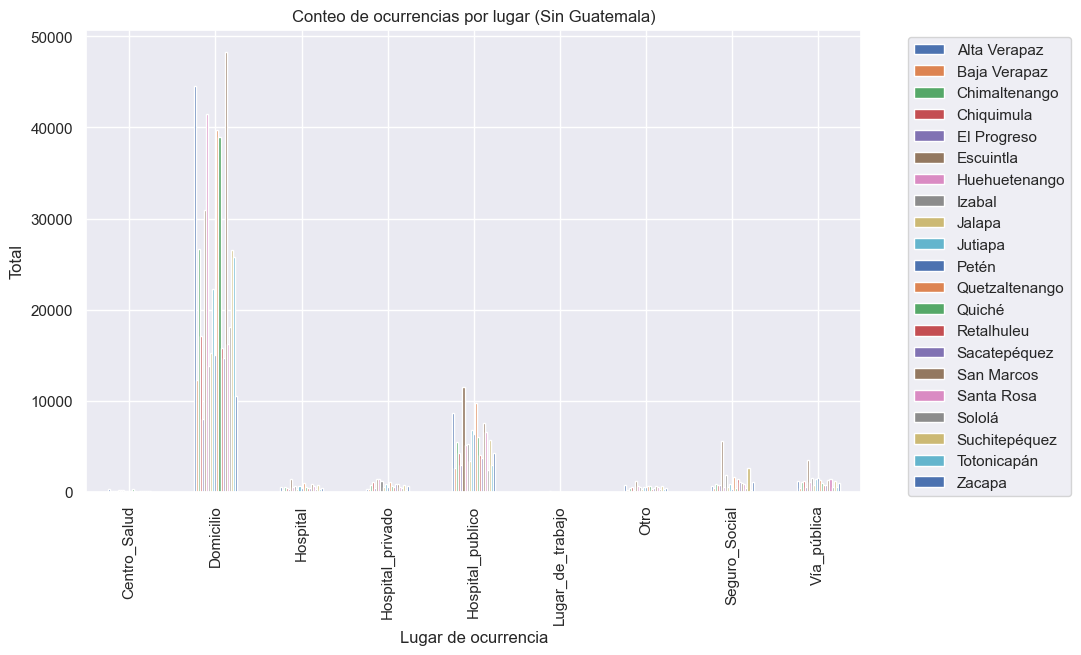

In [137]:
tabla.plot(kind='bar', figsize=(10, 6))
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('Lugar de ocurrencia')
plt.ylabel('Total')
plt.title('Conteo de ocurrencias por lugar (Sin Guatemala)')
plt.show()

In [138]:
tabla = pd.pivot_table(
    ocurrencias[ocurrencias['Departamento'] != 'Guatemala'], 
    values = ['Hospital_publico', 'Hospital_privado', 'Hospital', 'Centro_Salud', 'Seguro_Social', 'Vía_pública', 'Lugar_de_trabajo', 'Otro'],

    columns = 'Departamento',
    aggfunc='sum'
)

tabla

Departamento      Alta Verapaz  Baja Verapaz  Chimaltenango  Chiquimula  \
Centro_Salud               263            76             63          84   
Hospital                   536           221            462         435   
Hospital_privado           320           277            689        1098   
Hospital_publico          8663          2606           5399        4244   
Lugar_de_trabajo             8             1              4           3   
Otro                       708           202            394         516   
Seguro_Social              644           442            813         747   
Vía_pública               1216           453           1052        1173   

Departamento      El Progreso  Escuintla  Huehuetenango  Izabal  Jalapa  \
Centro_Salud               19        129            179     194      38   
Hospital                  340       1358            472     575     337   
Hospital_privado          449       1346           1349    1115     529   
Hospital_publico         2918      11505           5084    5285    3346   
Lugar_de_trabajo            1         14             13       5       1   
Otro                      220       1141            607     537     336   
Seguro_Social             700       5550            462    1844     502   
Vía_pública               547       3501           1063    1516     714   

Departamento      Jutiapa  ...  Quetzaltenango  Quiché  Retalhuleu  \
Centro_Salud           77  ...              33     278          42   
Hospital              603  ...             893     473         377   
Hospital_privado      860  ...            1042     627         534   
Hospital_publico     6715  ...            9726    6053        3988   
Lugar_de_trabajo        0  ...               3       7           2   
Otro                  502  ...             613     569         240   
Seguro_Social         857  ...            1595     381        1398   
Vía_pública          1360  ...            1267     930         683   

Departamento      Sacatepéquez  San Marcos  Santa Rosa  Sololá  Suchitepéquez  \
Centro_Salud                11          75          63      29             37   
Hospital                   437         798         605     275            692   
Hospital_privado           818         871         505     371            771   
Hospital_publico          3693        7522        6573    2409           5647   
Lugar_de_trabajo             3           3           3       0              3   
Otro                       431         579         492     299            585   
Seguro_Social             1013         974         873     351           2552   
Vía_pública                713        1252        1371     532           1164   

Departamento      Totonicapán  Zacapa  
Centro_Salud               39      74  
Hospital                  265     419  
Hospital_privado          223     597  
Hospital_publico         2951    4230  
Lugar_de_trabajo            1       0  
Otro                      275     415  
Seguro_Social             168    1078  
Vía_pública               470     954  

[8 rows x 21 columns]

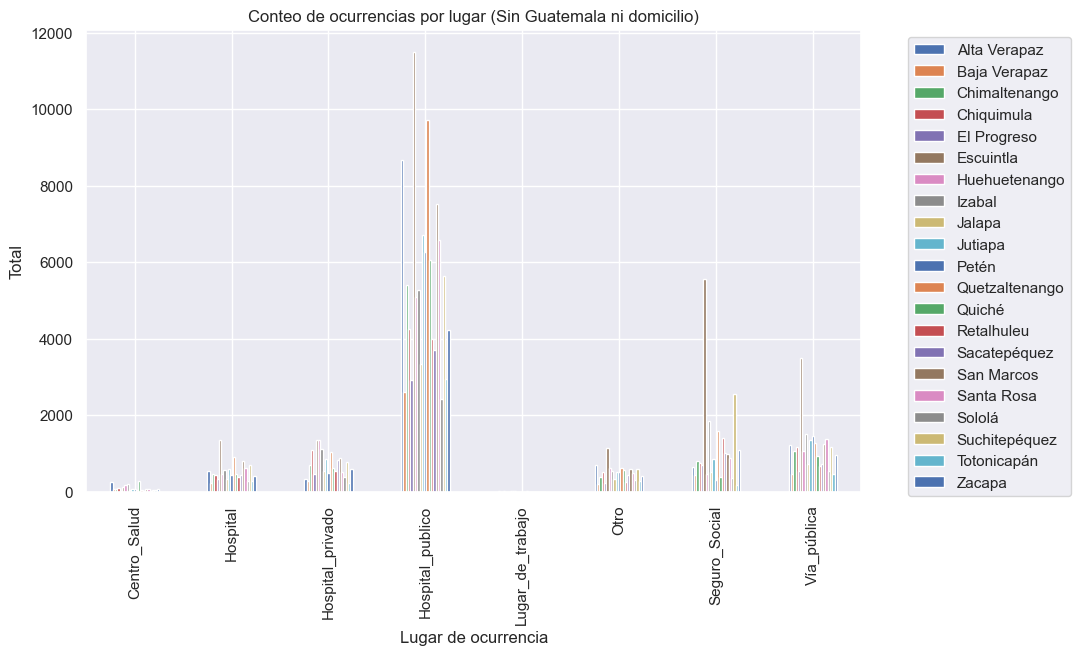

In [139]:
tabla.plot(kind='bar', figsize=(10, 6))
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('Lugar de ocurrencia')
plt.ylabel('Total')
plt.title('Conteo de ocurrencias por lugar (Sin Guatemala ni domicilio)')
plt.show()

<AxesSubplot: >

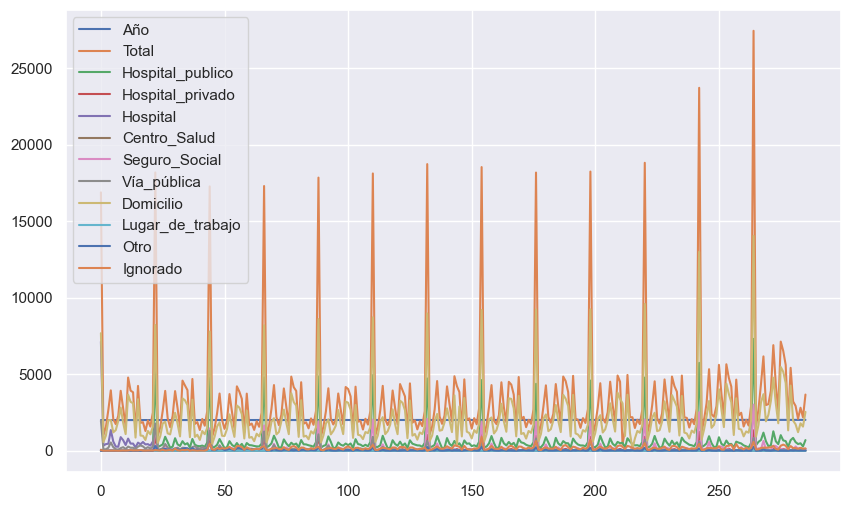

In [111]:
ocurrencias.plot(figsize=(10, 6))

<AxesSubplot: >

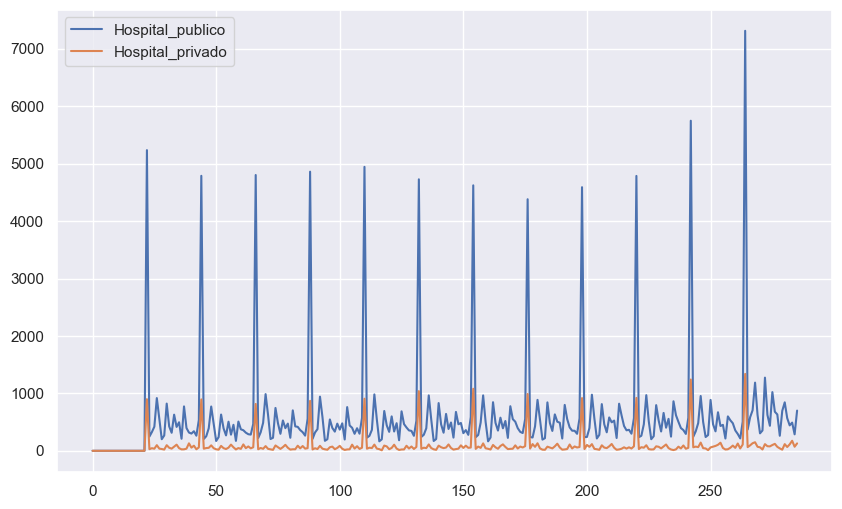

In [116]:
ocurrencias[['Hospital_publico', 'Hospital_privado']].plot(figsize=(10, 6))

In [128]:
tabla = pd.pivot_table(
    ocurrencias, 
    values = 'Total',
    columns = 'Departamento',
    index = ['Hospital_publico', 'Hospital_privado', 'Hospital', 'Centro_Salud', 'Seguro_Social', 'Vía_pública', 'Lugar_de_trabajo'],
    aggfunc='sum'
)

tabla

Departamento                                                                                        Alta Verapaz  \
Hospital_publico Hospital_privado Hospital Centro_Salud Seguro_Social Vía_pública Lugar_de_trabajo                 
0                0                221      6            0             120         0                          NaN   
                                  265      2            0             75          0                          NaN   
                                  275      3            0             104         0                          NaN   
                                  337      2            0             144         0                          NaN   
                                  340      12           0             95          0                          NaN   
...                                                                                                          ...   
4860             870              0        0            1925          1075        4                          NaN   
4944             907              0        0            2039          911         4                          NaN   
5235             899              0        17           1659          1789        4                          NaN   
5747             1241             0        13           2518          597         0                          NaN   
7313             1339             0        21           3021          843         0                          NaN   

Departamento                                                                                        Baja Verapaz  \
Hospital_publico Hospital_privado Hospital Centro_Salud Seguro_Social Vía_pública Lugar_de_trabajo                 
0                0                221      6            0             120         0                       1238.0   
                                  265      2            0             75          0                          NaN   
                                  275      3            0             104         0                          NaN   
                                  337      2            0             144         0                          NaN   
                                  340      12           0             95          0                          NaN   
...                                                                                                          ...   
4860             870              0        0            1925          1075        4                          NaN   
4944             907              0        0            2039          911         4                          NaN   
5235             899              0        17           1659          1789        4                          NaN   
5747             1241             0        13           2518          597         0                          NaN   
7313             1339             0        21           3021          843         0                          NaN   

Departamento                                                                                        Chimaltenango  \
Hospital_publico Hospital_privado Hospital Centro_Salud Seguro_Social Vía_pública Lugar_de_trabajo                  
0                0                221      6            0             120         0                           NaN   
                                  265      2            0             75          0                           NaN   
                                  275      3            0             104         0                           NaN   
                                  337      2            0             144         0                           NaN   
                                  340      12           0             95          0                           NaN   
...                                                                                                           ...   
4860             870              0        0  

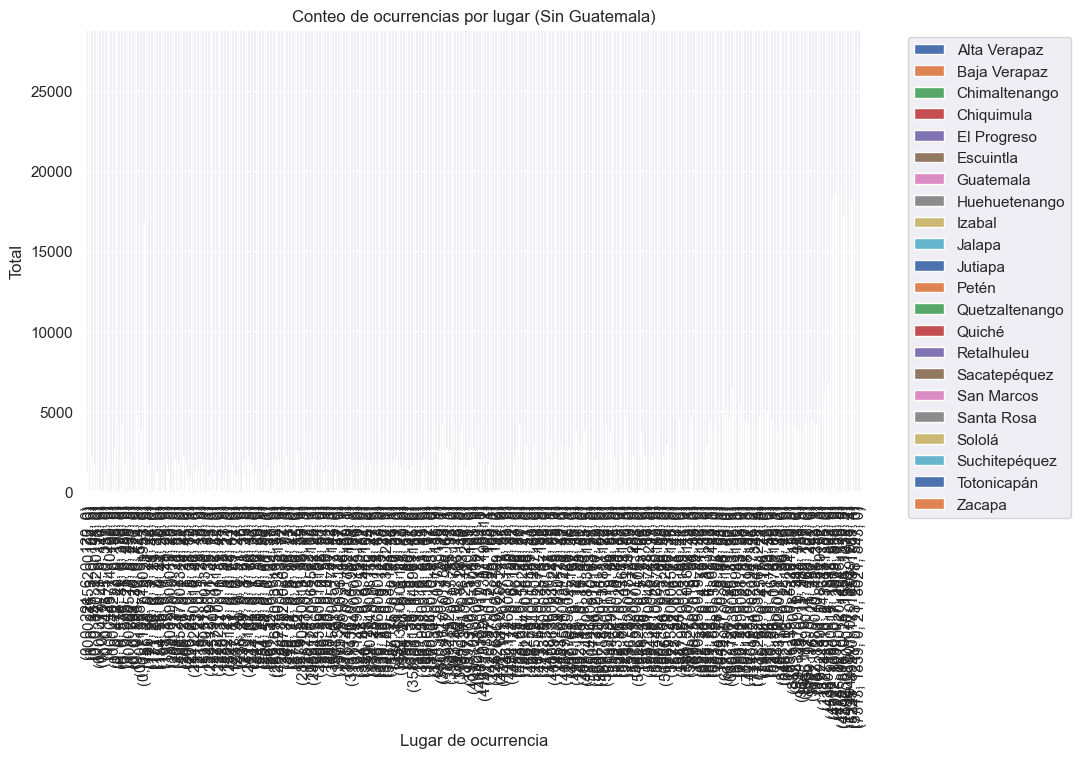

In [129]:
tabla.plot(kind='bar', figsize=(10, 6))
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('Lugar de ocurrencia')
plt.ylabel('Total')
plt.title('Conteo de ocurrencias por lugar (Sin Guatemala)')
plt.show()